In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# matplotlib parameters to ensure correctness of Chinese characters 
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.sans-serif']=['Arial Unicode MS', 'SimHei'] # Chinese font
plt.rcParams['axes.unicode_minus']=False # correct minus sign

plt.rcParams["font.size"] = 16
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

In [22]:
class UpdateFigure:
    def __init__(self, 
        ax:plt.Axes, dx:float=0.05):
        """Plot the first frame for the animation.
        Args:
            ax (plt.Axes): axes of flight icons.
        """

        self.ax = ax
        self.ax.spines["top"].set_visible(True)
        self.ax.spines["right"].set_visible(True)
        self.x = np.linspace(-2,2,500)
        self.depsilon = dx

        self.ax.set_xlim(-2,2)
        self.ax.set_ylim(0, 1)
        self.ax.plot(self.x,self._gauss(self.x), color='k', zorder=1)
        self.ax.axvline(0, ymax=0.9, ls='--', color='grey')
        self.ax.axvline(0.5, ymax=0.8, ls='--', color='g')
        self.ax.axvline(-0.5, ymax=0.8, ls='--', color='g')
        self._shading(0.5,sigma=0.1)
        self.ax.text(0.5, 0.25, r'$\varepsilon$', )
        self.ax.text(-0.5, 0.25, r'$\varepsilon$', )

    @staticmethod
    def _gauss(x,sigma=0.1):
        return np.exp(-x**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

    def _shading(self,epsilon,sigma):
        #画阴影部分
        self.ax.fill_between(self.x[self.x>=epsilon], 0, self._gauss(self.x[self.x>=epsilon],sigma), fc='r', alpha=0.5)
        self.ax.fill_between(self.x[self.x<=-epsilon], 0, self._gauss(self.x[self.x<=-epsilon],sigma), fc='r', alpha=0.5)

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        # clear current axis and replot
        self.ax.cla() #清除画布
        self.ax.set_xlim(-2,2)
        self.ax.set_ylim(0, 1)
        sigma=0.1+i*0.01
        line=self.ax.plot(self.x,self._gauss(self.x,sigma), color='k', zorder=1)
        self.ax.axvline(0, ymax=0.9, ls='--', color='grey')
        eps = 0.5
        self.ax.axvline(eps, ymax=0.8, ls='--', color='g')
        self.ax.axvline(-eps, ymax=0.8, ls='--', color='g')
        self._shading(eps,sigma)
        self.ax.text(eps, 0.25, r'$\varepsilon$', )
        self.ax.text(-eps, 0.25, r'$\varepsilon$', )
        return line

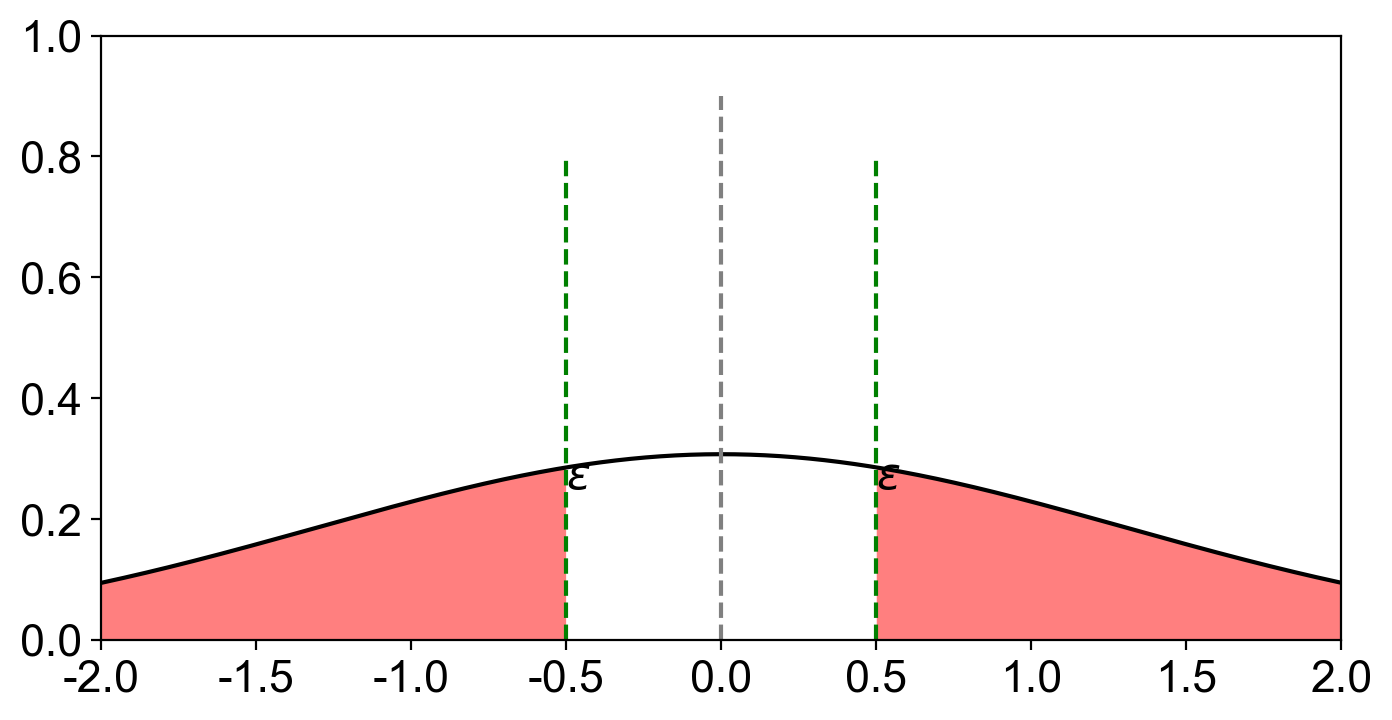

In [24]:
fig, ax = plt.subplots(1,1, figsize=(8,4),dpi=200)

# create a figure updater
ud = UpdateFigure(ax, dx=0.005)
# user FuncAnimation to generate frames of animation
anim = FuncAnimation(fig, ud, frames=121, blit=True)
# save animation as *.mp4
anim.save('chebyshev_movie2.mp4', fps=60, dpi=200, codec='libx264', bitrate=-1, extra_args=['-pix_fmt', 'yuv420p'])

In [5]:
2/np.pi/0.5

1.2732395447351628